## Imports

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots


In [13]:
df = pd.read_csv('data/data_model.csv')

In [14]:
df.head()

,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
2,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
3,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
4,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# # Split date up into year, month, week, day for more
# df['Day'] = pd.to_datetime(df['Date']).dt.day
# df['Year'] = pd.to_datetime(df['Date']).dt.year
# df['Month'] = pd.to_datetime(df['Date']).dt.month
# df['Week'] = pd.to_datetime(df['Date']).dt.isocalendar().week

In [18]:
# df.set_index('Date', inplace=True)

In [10]:
# df.head()

In [19]:
df.rename(columns = {'Weekly_Sales': 'y', 'Date': 'ds'}, inplace = True)
df.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,False,False,False,False,False,False,False,False,False,False
2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,False,False,False,False,False,False,False,False,False,False
2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,False,False,False,False,False,False,False,False,False,False
2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,False,False,False,False,False,False,False,False,False,False
2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,False,False,False,False,False,False,False,False,False,False


### TTS

In [7]:
y = df['Weekly_Sales']
X = df.drop(columns = 'Weekly_Sales')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False, random_state=123)

In [9]:
model = XGBRegressor(random_state=123, n_jobs=4, n_estimators=20, max_depth=4)

In [10]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=4,
             num_parallel_tree=None, random_state=123, ...)

In [11]:
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

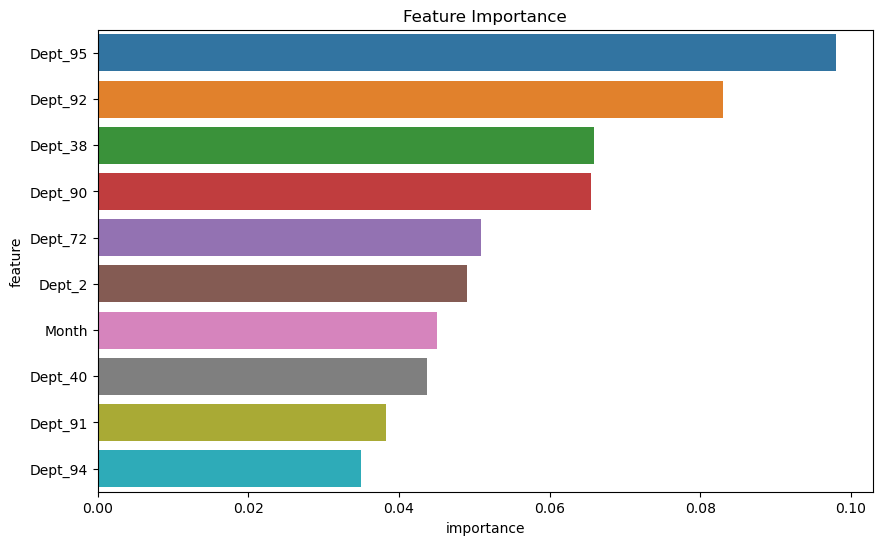

In [12]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [13]:
# Make and evaluate predictions:
x_pred = model.predict(X_test)
x_pred

array([ 9876.129,  9876.129, 72478.14 , ..., 35961.375,  9876.129,
        9876.129], dtype=float32)

In [14]:
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [15]:
rmse(x_pred,y_test)

11451.649260666307

## RF

In [16]:
RF = RandomForestRegressor()
# RF = RandomForestRegressor(n_estimators=58, max_depth=27, max_features=6, min_samples_split=3, min_samples_leaf=1)

In [17]:
pgrid = {
    'n_estimators': [int(x) for x in np.linspace(start = 20, stop = 500, num = 20)],
    'min_samples_leaf': [1, 2, 4, 3, 5],
    'max_features': [int(x) for x in np.linspace(start = 1, stop = 100, num = 20)],
    'max_depth': [int(x) for x in np.linspace(10, 300, num = 20)]
}

In [18]:
# Instantiate randomsearchCV
rf = RandomizedSearchCV(RF, pgrid, n_iter = 1, cv=5, n_jobs=8)

In [19]:
rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=1, n_jobs=8,
                   param_distributions={'max_depth': [10, 25, 40, 55, 71, 86,
                                                      101, 116, 132, 147, 162,
                                                      177, 193, 208, 223, 238,
                                                      254, 269, 284, 300],
                                        'max_features': [1, 6, 11, 16, 21, 27,
                                                         32, 37, 42, 47, 53, 58,
                                                         63, 68, 73, 79, 84, 89,
                                                         94, 100],
                                        'min_samples_leaf': [1, 2, 4, 3, 5],
                                        'n_estimators': [20, 45, 70, 95, 121,
                                                         146, 171, 196, 222,
                                                         247, 272, 297, 323,
                                                         348, 373, 398, 424,
                                                         449, 474, 500]})

In [20]:
rf.score(X_test, y_test)

0.7921213023310529

In [21]:
rf.best_params_

{'n_estimators': 70,
 'min_samples_leaf': 3,
 'max_features': 16,
 'max_depth': 86}

## Test data

In [22]:
data_test = pd.read_csv('data/data_test.csv')

In [23]:
# Split date up into year, month, week, day for more
data_test['Day'] = pd.to_datetime(data_test['Date']).dt.day
data_test['Year'] = pd.to_datetime(data_test['Date']).dt.year
data_test['Month'] = pd.to_datetime(data_test['Date']).dt.month
data_test['Week'] = pd.to_datetime(data_test['Date']).dt.isocalendar().week

In [24]:
data_test.set_index('Date', inplace=True)

In [25]:
data_test.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,...,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Day,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,,,
2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,...,False,False,False,False,False,False,2,2012,11,44
2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,...,False,False,False,False,False,False,2,2012,11,44
2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,...,False,False,False,False,False,False,2,2012,11,44
2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,...,False,False,False,False,False,False,2,2012,11,44
2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,...,False,False,False,False,False,False,2,2012,11,44


In [26]:
data_test.isna().sum().sort_values(ascending=False)

CPI             38162
Unemployment    38162
Temperature         0
Dept_43             0
Dept_37             0
                ...  
Store_31            0
Store_30            0
Store_29            0
Store_28            0
Week                0
Length: 141, dtype: int64

Missing values at the end for CPI and UE. Replace these with mean values for now

In [27]:
data_test = data_test.fillna(data_test.mean())

In [28]:
data_test.isna().sum().sort_values(ascending=False)

Temperature    0
Dept_43        0
Dept_37        0
Dept_38        0
Dept_39        0
              ..
Store_30       0
Store_29       0
Store_28       0
Store_27       0
Week           0
Length: 141, dtype: int64

In [29]:
test_preds = rf.predict(data_test)

In [30]:
data_test['pred'] = test_preds

C:\Users\johng\AppData\Local\Temp\ipykernel_4788\464179709.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_test['pred'] = test_preds


## Submission

In [31]:
submission1 = pd.read_csv('data/sampleSubmission.csv')

In [32]:
submission1['Weekly_Sales'] = test_preds

In [33]:
submission1.set_index('Id', inplace=True)

In [34]:
submission1.to_csv('data/submission1_rf.csv')